In [2]:
import pandas as pd
from dpks.quant_matrix import QuantMatrix

In [4]:
df  = pd.read_csv('../../data/ms/covid/Charite-DIA-NN_analysis.txt', sep="\t")
df

,File.Name,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,Genes.Quantity,Genes.Normalised,Genes.MaxLFQ,...,Ms1.Profile.Corr,Ms1.Area,Evidence,CScore,Decoy.Evidence,Decoy.CScore,Fragment.Quant.Raw,Fragment.Quant.Corrected,Fragment.Correlations,MS2.Scan
0,20200520_TOF1_AF_002_ZeBanC_P1_A1,P62328,P62328,TYB4_HUMAN,TMSB4X,220.6100,265.3060,220.6100,265.3060,301.6180,...,0.829595,29.22790,5.49635,0.985929,2.92534,0.060668,160.327;47.9471;12.3367;17.9965;8.01309;19.4518;,160.327;47.9471;12.3367;17.9965;8.01309;19.4518;,0.925382;0.950765;0.767365;0.941466;0.936874;0...,5557
1,20200520_TOF1_AF_002_ZeBanC_P1_A1,P69905,P69905,HBA_HUMAN,HBA1,6214.2700,7013.2800,6214.2700,7013.2800,8278.8000,...,-0.297725,0.00000,5.06084,0.985997,2.33261,0.067343,25.6638;8.396;6.18597;1.94164;2.32493;0.733528;,25.6638;8.396;6.18597;1.94164;2.32493;0.733528;,0.913847;0.937788;0.867167;0.852997;0.705311;0...,4509
2,20200520_TOF1_AF_002_ZeBanC_P1_A1,P05154,P05154;G3V5I3,IPSP_HUMAN,SERPINA5,27.4723,32.1755,27.4723,32.1755,38.7321,...,-0.146354,5.20829,2.70173,0.894658,2.53872,0.142001,7.74046;10.2638;7.18463;7.90645;4.64509;5.3478;,7.74046;10.2638;7.18463;7.90645;4.64509;5.3478;,0.968113;0.897015;-0.0564115;0.414028;0.66516;...,6585
3,20200520_TOF1_AF_002_ZeBanC_P1_A1,P0C0L4;P0C0L5,P0C0L4;P0C0L4-2;P0C0L5;A0A140TA49;A0A140TA44;A...,CO4A_HUMAN;CO4B_HUMAN,C4A;C4B,2729.9100,3652.1000,2729.9100,3652.1000,1625.4000,...,-0.033743,25.53180,4.33940,0.985945,3.11412,0.627809,25.1185;8.56422;8.59741;15.1916;10.6556;0.277055;,25.1185;8.56422;8.59741;15.1916;10.6556;0.277055;,0.954628;0.879522;0.967065;0.941909;0.925769;-...,7620
4,20200520_TOF1_AF_002_ZeBanC_P1_A1,P02768,P02768;H0YA55;D6RHD5;B7WNR0;A0A0C4DGB6,ALBU_HUMAN,ALB,70040.5000,83511.4000,70040.5000,83511.4000,80283.6000,...,0.994493,13029.50000,5.91383,0.985618,3.78484,0.980454,11850.2;7307.5;6059.6;2147.6;807.542;650.726;,11850.2;7307.5;6059.6;2147.6;807.542;650.726;,0.986593;0.988532;0.985106;0.986919;0.986507;0...,4271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370052,20200819_TOF1_AF_125_FlorianKurthValidation_Pl...,P07358,P07358;F5H7G1;F5GY80,CO8B_HUMAN,C8B,202.0630,341.2450,202.0630,341.2450,816.8380,...,0.123995,81.60950,3.78462,0.963329,1.97871,0.051855,11.3524;1.08163;6.65871;9.19761;0.877544;7.41106;,11.3524;1.08163;6.65871;9.19761;0.877544;7.41106;,0.936092;0.721454;0.165325;0.897203;-0.321071;...,4883
3370053,20200819_TOF1_AF_125_FlorianKurthValidation_Pl...,P02790,P02790;Q9BS19,HEMO_HUMAN,HPX,4668.0000,7069.5900,4668.0000,7069.5900,7204.8200,...,0.937383,678.43500,4.46179,0.967921,2.02134,0.302594,262.688;272.581;0;280.852;60.6779;19.3927;,262.688;272.581;0;280.852;60.6779;19.3927;,0.946269;0.938073;0;0.949398;0.929762;0.544515;,6419
3370054,20200819_TOF1_AF_125_FlorianKurthValidation_Pl...,P02790,P02790;Q9BS19,HEMO_HUMAN,HPX,4668.0000,7069.5900,4668.0000,7069.5900,7204.8200,...,-0.183356,0.00000,5.09443,0.971437,2.19529,0.176119,94.3322;40.8498;40.7127;44.0437;27.5756;7.41004;,94.3322;40.8498;40.7127;44.0437;27.5756;7.41004;,0.922662;0.858593;0.85436;0.941309;0.825781;0....,6427
3370055,20200819_TOF1_AF_125_FlorianKurthValidation_Pl...,Q14624,Q14624;B7ZKJ8,ITIH4_HUMAN,ITIH4,138.5120,201.8670,1346.2400,1848.3100,1552.6900,...,0.929633,38.92210,4.27372,0.971431,1.42198,0.054695,14.8138;8.81687;7.48242;1.80274;3.27717;5.50023;,14.8138;8.81687;7.48242;1.80274;3.27717;5.50023;,0.941844;0.941912;0.825825;-0.591241;0.952019;...,3599


In [19]:
df[(df['Precursor.Quantity'] < 1) & (df['Precursor.Quantity'] >0 )]['Precursor.Quantity']

2688       0.936900
3275       0.764485
6521       0.716377
10896      0.899427
12989      0.989478
             ...   
3219683    0.752758
3259879    0.603664
3268565    0.956159
3269938    0.899859
3301324    0.994210
Name: Precursor.Quantity, Length: 2571, dtype: float64

In [17]:
data =  pd.read_excel("../../data/ms/covid/charite-info.xlsx")
data

,File,Patient Id,Time point - days since admission,Time point - days until outcome,WHO grade,Max severity,Patient died,Will worsen in the future,DNI / DNR,Secondary DNI / DNR,Age,BMI,Charlson index,SOFA score,Horowitz index,FiO2
0,520_TOF1_AF_002_ZeBanC_P1_A1,123,23,5.0,7,7,1,1,0,0,53,39.61,1,NaN,204.8781,41.0
1,520_TOF1_AF_003_ZeBanC_P1_A2,42,21,52.0,6,7,0,1,0,0,69,24.49,2,5.0,108.9552,67.0
2,520_TOF1_AF_004_ZeBanC_P1_A3,42,31,42.0,6,7,0,0,0,0,69,24.49,2,4.0,292.0000,25.0
3,520_TOF1_AF_005_ZeBanC_P1_A4,109,32,13.0,6,7,0,0,0,0,60,35.51,3,7.0,254.2857,35.0
4,520_TOF1_AF_006_ZeBanC_P1_A5,26,34,70.0,7,7,1,1,0,1,81,30.86,7,4.0,340.0000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,710_TOF1_LS_473_ZeBanc2_P5_A12,7,37,62.0,7,7,0,0,0,0,58,29.30,2,NaN,264.5161,31.0
683,710_TOF1_LS_475_ZeBanc2_P2_H1,84,58,9.0,3,6,0,0,0,0,59,24.31,1,NaN,414.2857,21.0
684,710_TOF1_LS_476_ZeBanc2_P3_F11,160,69,-55.0,0,5,0,0,0,0,59,27.36,1,NaN,NaN,35.0
685,710_TOF1_LS_477_ZeBanc2_P5_H12,18,39,123.0,7,7,0,0,0,0,63,23.63,2,NaN,347.6190,21.0


In [15]:
design = pd.read_excel("../../data/ms/covid/charite-info.xlsx")
design

,File,Patient Id,Time point - days since admission,Time point - days until outcome,WHO grade,Max severity,Patient died,Will worsen in the future,DNI / DNR,Secondary DNI / DNR,Age,BMI,Charlson index,SOFA score,Horowitz index,FiO2
0,520_TOF1_AF_002_ZeBanC_P1_A1,123,23,5.0,7,7,1,1,0,0,53,39.61,1,NaN,204.8781,41.0
1,520_TOF1_AF_003_ZeBanC_P1_A2,42,21,52.0,6,7,0,1,0,0,69,24.49,2,5.0,108.9552,67.0
2,520_TOF1_AF_004_ZeBanC_P1_A3,42,31,42.0,6,7,0,0,0,0,69,24.49,2,4.0,292.0000,25.0
3,520_TOF1_AF_005_ZeBanC_P1_A4,109,32,13.0,6,7,0,0,0,0,60,35.51,3,7.0,254.2857,35.0
4,520_TOF1_AF_006_ZeBanC_P1_A5,26,34,70.0,7,7,1,1,0,1,81,30.86,7,4.0,340.0000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,710_TOF1_LS_473_ZeBanc2_P5_A12,7,37,62.0,7,7,0,0,0,0,58,29.30,2,NaN,264.5161,31.0
683,710_TOF1_LS_475_ZeBanc2_P2_H1,84,58,9.0,3,6,0,0,0,0,59,24.31,1,NaN,414.2857,21.0
684,710_TOF1_LS_476_ZeBanc2_P3_F11,160,69,-55.0,0,5,0,0,0,0,59,27.36,1,NaN,NaN,35.0
685,710_TOF1_LS_477_ZeBanc2_P5_H12,18,39,123.0,7,7,0,0,0,0,63,23.63,2,NaN,347.6190,21.0


In [18]:
data_files = data['File'].unique().tolist()
data_files = [x.lstrip("2020") for x in data_files]
data_files

['520_TOF1_AF_002_ZeBanC_P1_A1',
 '520_TOF1_AF_003_ZeBanC_P1_A2',
 '520_TOF1_AF_004_ZeBanC_P1_A3',
 '520_TOF1_AF_005_ZeBanC_P1_A4',
 '520_TOF1_AF_006_ZeBanC_P1_A5',
 '520_TOF1_AF_008_ZeBanC_P1_A6',
 '520_TOF1_AF_010_ZeBanC_P1_A8',
 '520_TOF1_AF_011_ZeBanC_P1_A9',
 '520_TOF1_AF_014_ZeBanC_P1_A11',
 '520_TOF1_AF_017_ZeBanC_P1_B2',
 '520_TOF1_AF_018_ZeBanC_P1_B3',
 '520_TOF1_AF_020_ZeBanC_P1_B4',
 '520_TOF1_AF_022_ZeBanC_P1_B6',
 '520_TOF1_AF_023_ZeBanC_P1_B7',
 '520_TOF1_AF_024_ZeBanC_P1_B8',
 '520_TOF1_AF_026_ZeBanC_P1_B9',
 '520_TOF1_AF_027_ZeBanC_P1_B10',
 '520_TOF1_AF_028_ZeBanC_P1_B11',
 '520_TOF1_AF_029_ZeBanC_P1_B12',
 '520_TOF1_AF_030_ZeBanC_P1_C1',
 '520_TOF1_AF_033_ZeBanC_P1_C2',
 '520_TOF1_AF_034_ZeBanC_P1_C3',
 '520_TOF1_AF_035_ZeBanC_P1_C4',
 '520_TOF1_AF_036_ZeBanC_P1_C5',
 '520_TOF1_AF_037_ZeBanC_P1_C6',
 '520_TOF1_AF_039_ZeBanC_P1_C7',
 '520_TOF1_AF_040_ZeBanC_P1_C8',
 '520_TOF1_AF_041_ZeBanC_P1_C9',
 '520_TOF1_AF_042_ZeBanC_P1_C10',
 '520_TOF1_AF_043_ZeBanC_P1_C11',
 '52

In [22]:
overlap = design[design['File'].isin(data_files)]
overlap

,File,Patient Id,Time point - days since admission,Time point - days until outcome,WHO grade,Max severity,Patient died,Will worsen in the future,DNI / DNR,Secondary DNI / DNR,Age,BMI,Charlson index,SOFA score,Horowitz index,FiO2
0,520_TOF1_AF_002_ZeBanC_P1_A1,123,23,5.0,7,7,1,1,0,0,53,39.61,1,NaN,204.8781,41.0
1,520_TOF1_AF_003_ZeBanC_P1_A2,42,21,52.0,6,7,0,1,0,0,69,24.49,2,5.0,108.9552,67.0
2,520_TOF1_AF_004_ZeBanC_P1_A3,42,31,42.0,6,7,0,0,0,0,69,24.49,2,4.0,292.0000,25.0
3,520_TOF1_AF_005_ZeBanC_P1_A4,109,32,13.0,6,7,0,0,0,0,60,35.51,3,7.0,254.2857,35.0
4,520_TOF1_AF_006_ZeBanC_P1_A5,26,34,70.0,7,7,1,1,0,1,81,30.86,7,4.0,340.0000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,710_TOF1_LS_473_ZeBanc2_P5_A12,7,37,62.0,7,7,0,0,0,0,58,29.30,2,NaN,264.5161,31.0
683,710_TOF1_LS_475_ZeBanc2_P2_H1,84,58,9.0,3,6,0,0,0,0,59,24.31,1,NaN,414.2857,21.0
684,710_TOF1_LS_476_ZeBanc2_P3_F11,160,69,-55.0,0,5,0,0,0,0,59,27.36,1,NaN,NaN,35.0
685,710_TOF1_LS_477_ZeBanc2_P5_H12,18,39,123.0,7,7,0,0,0,0,63,23.63,2,NaN,347.6190,21.0


In [23]:
overlap['Group'] = overlap['WHO grade'].apply(lambda x: 1 if x <6 else 2)
overlap = overlap[['File','Group']]
overlap.rename(columns={'File': 'Samples'}, inplace=True)
#overlap.to_csv('../../data/ms/covid/design_cropped.tsv', sep='\t',index=False)

/tmp/ipykernel_3759/220667140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overlap.rename(columns={'File': 'Samples'}, inplace=True)


In [24]:
design['Group'] = design['WHO grade'].apply(lambda x: 1 if x <6 else 2)
design['count'] = 1
design.groupby('Group').sum()

,Patient Id,Time point - days since admission,Time point - days until outcome,WHO grade,Max severity,Patient died,Will worsen in the future,DNI / DNR,Secondary DNI / DNR,Age,BMI,Charlson index,SOFA score,Horowitz index,FiO2,count
Group,,,,,,,,,,,,,,,,
1,21890,6161,2471.0,998,1404,19,40,12,5,17407,7871.51,928,186.0,31475.10745,6383.16667,281
2,33270,11652,15991.0,2736,2823,81,103,0,38,24636,12248.97,1161,2242.0,120974.62863,11900.00000,406


In [37]:
design_out = design[['File','Group']]
design_out.rename(columns={'File': 'Samples'}, inplace=True)
design_out.to_csv('../../data/ms/covid/design.csv', index=False)

/tmp/ipykernel_30327/1779852249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design_out.rename(columns={'File': 'Samples'}, inplace=True)


In [25]:
overlap_files = overlap['Samples'].values.tolist()

In [26]:
data = pd.read_csv('../../data/ms/covid/data.tsv', sep="\t")
data = data[['PeptideSequence','Charge','Decoy','Protein','RetentionTime','PeptideQValue','ProteinQValue']+overlap_files]

In [108]:
data.to_csv('../../data/ms/covid/data_cropped.tsv', index=False, sep="\t")

In [35]:
data = pd.read_csv('../../data/ms/covid/Charite-DIA-NN_analysis.txt', sep="\t")

In [45]:
data['Decoy'] = 0
data_f=  data[['File.Name','Modified.Sequence','Precursor.Charge','Decoy','Protein.Group','RT','Q.Value','Protein.Q.Value','Precursor.Quantity']]
data_f['Protein.Group'] = data_f['Protein.Group'].astype(str)
print(len(data_f.index))

3370057


/tmp/ipykernel_30595/1296873149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Protein.Group'] = data_f['Protein.Group'].astype(str)


In [46]:
data_f = data_f[~data_f['Protein.Group'].str.contains(';')]
print(len(data_f.index))

2855866


In [5]:
data_p = data_f.set_index(['Modified.Sequence','Precursor.Charge','Decoy','Protein.Group'])
data_p

NameError: name 'data_f' is not defined

In [54]:
data_p = data_p.pivot(columns='File.Name')

In [55]:
qvalues = data_p['Q.Value'].mean(axis=1).values
rts = data_p['RT'].mean(axis=1).values
protein_qvalues = data_p['Protein.Q.Value'].mean(axis=1).values

In [56]:
data_p = data_p['Precursor.Quantity']

In [57]:
data_p['RT'] =rts
data_p['Q.Value'] = qvalues
data_p['Protein.Q.value'] = protein_qvalues

In [68]:

data_p.rename(columns={'Modified.Sequence':'PeptideSequence','Precursor.Charge':'Charge',
                       'Protein.Group':'Protein', 'Q.Value':'PeptideQValue','Protein.Q.value':'ProteinQValue'
                       , 'RT':'RetentionTime'}, inplace=True)

In [74]:
file_cols = [col for col in data_p.columns if col.startswith('2')]

data_p_out = data_p[['PeptideSequence','Charge','Decoy','Protein','RetentionTime','PeptideQValue','ProteinQValue']+file_cols]
data_p_out.columns = [col.lstrip('20200') for col in data_p_out.columns]
data_p_out

,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,520_TOF1_AF_004_ZeBanC_P1_A3,...,819_TOF1_AF_088_FlorianKurthValidation_PlasmaBatch_005,819_TOF1_AF_091_FlorianKurthValidation_P1_F1,819_TOF1_AF_094_FlorianKurthValidation_ZeBanCBatch_005,819_TOF1_AF_097_FlorianKurthValidation_P1_A12,819_TOF1_AF_101_FlorianKurthValidation_PlasmaBatch_006,819_TOF1_AF_102_FlorianKurthValidation_P1_G12,819_TOF1_AF_107_FlorianKurthValidation_QC_006,819_TOF1_AF_113_FlorianKurthValidation_ZeBanCBatch_006,819_TOF1_AF_115_FlorianKurthValidation_P1_B11,819_TOF1_AF_125_FlorianKurthValidation_PlasmaBatch_007
0,(UniMod:1)SDKPDMAEIEKFDK,3,0,P62328,2.737421,0.001223,0.025862,220.6100,684.7540,662.38200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(UniMod:1)VLSPADKTNVK,2,0,P69905,2.214961,0.004215,0.005105,40.2458,NaN,5.82414,...,NaN,NaN,NaN,NaN,NaN,NaN,19.6395,NaN,NaN,NaN
2,AAAATGTIFTFR,2,0,P05154,3.229917,0.004999,0.005173,22.6494,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAC(UniMod:4)LLPK,1,0,P02768,2.101821,0.000971,0.005215,21305.3000,22887.0000,22784.50000,...,8910.590,58784.2000,53163.3000,63497.4000,9119.010,56577.8000,56265.6000,54376.000,47489.2000,8875.210
4,AAC(UniMod:4)LLPKLDELRDEGK,3,0,P02768,2.947363,0.003026,0.005805,NaN,NaN,NaN,...,380.149,NaN,NaN,NaN,388.123,NaN,NaN,NaN,NaN,371.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,YYTYLIMNK,2,0,P01024,3.083742,0.001154,0.005215,563.1500,2087.8800,2108.66000,...,541.588,1149.1100,1072.8100,1194.7500,581.870,1177.5400,1206.9600,1051.970,1299.2900,530.369
4334,YYWGGQYTWDM(UniMod:35)AK,2,0,P02675,3.216724,0.005122,0.005019,62.8561,NaN,NaN,...,NaN,NaN,53.4848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4335,YYWGGQYTWDMAK,2,0,P02675,3.547194,0.001422,0.005136,7626.4200,4533.9500,3941.81000,...,NaN,2182.6000,2469.8100,2305.1200,NaN,2245.7100,3467.2200,2403.720,2468.8500,NaN
4336,YYWGGQYTWDMAK,3,0,P02675,3.547423,0.001169,0.005124,2154.1400,1350.7100,1117.74000,...,NaN,628.6680,851.5200,691.6420,NaN,608.7650,1030.5800,777.924,673.5080,NaN


In [77]:
data_p_out.to_csv('../../data/ms/covid/data.tsv', index=False, sep="\t")

In [10]:
import numpy as np

In [53]:
data = pd.read_csv('../../data/ms/covid/data_cropped.tsv', sep="\t")
data.replace(0, np.nan, inplace=True)

In [54]:
data

,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,520_TOF1_AF_004_ZeBanC_P1_A3,...,710_TOF1_LS_465_ZeBanc2_P4_G11,710_TOF1_LS_466_ZeBanc2_P1_F9,710_TOF1_LS_467_ZeBanc2_P1_H12,710_TOF1_LS_470_ZeBanc2_P2_A9,710_TOF1_LS_471_ZeBanc2_P4_A8,710_TOF1_LS_473_ZeBanc2_P5_A12,710_TOF1_LS_475_ZeBanc2_P2_H1,710_TOF1_LS_476_ZeBanc2_P3_F11,710_TOF1_LS_477_ZeBanc2_P5_H12,710_TOF1_LS_478_ZeBanc2_P3_C2
0,(UniMod:1)SDKPDMAEIEKFDK,3,NaN,P62328,2.737421,0.001223,0.025862,220.6100,684.7540,662.38200,...,NaN,NaN,408.6570,NaN,NaN,NaN,NaN,NaN,351.7860,NaN
1,(UniMod:1)VLSPADKTNVK,2,NaN,P69905,2.214961,0.004215,0.005105,40.2458,NaN,5.82414,...,NaN,NaN,22.2218,10.4322,NaN,NaN,NaN,17.2096,63.1904,22.2713
2,AAAATGTIFTFR,2,NaN,P05154,3.229917,0.004999,0.005173,22.6494,NaN,NaN,...,NaN,NaN,64.8746,NaN,NaN,30.1652,NaN,64.0550,27.2525,44.1009
3,AAC(UniMod:4)LLPK,1,NaN,P02768,2.101821,0.000971,0.005215,21305.3000,22887.0000,22784.50000,...,34393.5000,27862.7000,41045.4000,40618.1000,47794.700,34169.4000,49482.1000,56169.5000,40306.0000,53756.5000
4,AAC(UniMod:4)LLPKLDELRDEGK,3,NaN,P02768,2.947363,0.003026,0.005805,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,YYTYLIMNK,2,NaN,P01024,3.083742,0.001154,0.005215,563.1500,2087.8800,2108.66000,...,1414.8200,1772.4600,1228.6900,776.8900,1245.590,617.9060,1301.6200,856.7420,792.8530,988.0390
4334,YYWGGQYTWDM(UniMod:35)AK,2,NaN,P02675,3.216724,0.005122,0.005019,62.8561,NaN,NaN,...,NaN,65.2932,96.8821,64.6273,NaN,NaN,NaN,NaN,NaN,NaN
4335,YYWGGQYTWDMAK,2,NaN,P02675,3.547194,0.001422,0.005136,7626.4200,4533.9500,3941.81000,...,4023.4700,4767.9200,3817.1200,3545.7300,3243.220,1942.4100,3171.6400,2251.9000,1023.0700,1508.2600
4336,YYWGGQYTWDMAK,3,NaN,P02675,3.547423,0.001169,0.005124,2154.1400,1350.7100,1117.74000,...,1148.6800,1337.6700,1067.3000,1092.3400,893.070,735.9820,1012.7600,758.5200,424.7410,463.1180


In [67]:
data['Decoy'] = 0
data = data.dropna(subset=['Protein'])
data.to_csv('../../data/ms/covid/data_cropped.tsv', sep="\t")
data

/tmp/ipykernel_3759/3873658194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decoy'] = 0


,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,520_TOF1_AF_004_ZeBanC_P1_A3,...,710_TOF1_LS_465_ZeBanc2_P4_G11,710_TOF1_LS_466_ZeBanc2_P1_F9,710_TOF1_LS_467_ZeBanc2_P1_H12,710_TOF1_LS_470_ZeBanc2_P2_A9,710_TOF1_LS_471_ZeBanc2_P4_A8,710_TOF1_LS_473_ZeBanc2_P5_A12,710_TOF1_LS_475_ZeBanc2_P2_H1,710_TOF1_LS_476_ZeBanc2_P3_F11,710_TOF1_LS_477_ZeBanc2_P5_H12,710_TOF1_LS_478_ZeBanc2_P3_C2
0,(UniMod:1)SDKPDMAEIEKFDK,3,0,P62328,2.737421,0.001223,0.025862,220.6100,684.7540,662.38200,...,NaN,NaN,408.6570,NaN,NaN,NaN,NaN,NaN,351.7860,NaN
1,(UniMod:1)VLSPADKTNVK,2,0,P69905,2.214961,0.004215,0.005105,40.2458,NaN,5.82414,...,NaN,NaN,22.2218,10.4322,NaN,NaN,NaN,17.2096,63.1904,22.2713
2,AAAATGTIFTFR,2,0,P05154,3.229917,0.004999,0.005173,22.6494,NaN,NaN,...,NaN,NaN,64.8746,NaN,NaN,30.1652,NaN,64.0550,27.2525,44.1009
3,AAC(UniMod:4)LLPK,1,0,P02768,2.101821,0.000971,0.005215,21305.3000,22887.0000,22784.50000,...,34393.5000,27862.7000,41045.4000,40618.1000,47794.700,34169.4000,49482.1000,56169.5000,40306.0000,53756.5000
4,AAC(UniMod:4)LLPKLDELRDEGK,3,0,P02768,2.947363,0.003026,0.005805,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,YYTYLIMNK,2,0,P01024,3.083742,0.001154,0.005215,563.1500,2087.8800,2108.66000,...,1414.8200,1772.4600,1228.6900,776.8900,1245.590,617.9060,1301.6200,856.7420,792.8530,988.0390
4334,YYWGGQYTWDM(UniMod:35)AK,2,0,P02675,3.216724,0.005122,0.005019,62.8561,NaN,NaN,...,NaN,65.2932,96.8821,64.6273,NaN,NaN,NaN,NaN,NaN,NaN
4335,YYWGGQYTWDMAK,2,0,P02675,3.547194,0.001422,0.005136,7626.4200,4533.9500,3941.81000,...,4023.4700,4767.9200,3817.1200,3545.7300,3243.220,1942.4100,3171.6400,2251.9000,1023.0700,1508.2600
4336,YYWGGQYTWDMAK,3,0,P02675,3.547423,0.001169,0.005124,2154.1400,1350.7100,1117.74000,...,1148.6800,1337.6700,1067.3000,1092.3400,893.070,735.9820,1012.7600,758.5200,424.7410,463.1180


In [2]:
quant_matrix = QuantMatrix(quantification_file = '../../data/ms/covid/data_cropped.tsv', 
                           design_matrix_file = '../../data/ms/covid/design_cropped.tsv')
qm = quant_matrix.normalize(method="mean").quantify(method='maxlfq', threads=12)

In [72]:
qm.to_df().to_csv('../../data/ms/covid/QuantMatrix.tsv', sep="\t",index=False)

<AxesSubplot:ylabel='Count'>

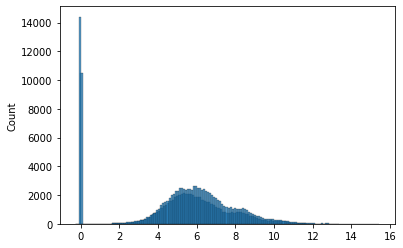

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(qm.to_df()[qm.get_samples(1)].fillna(0).to_numpy().flatten())
sns.histplot(qm.to_df()[qm.get_samples(2)].fillna(0).to_numpy().flatten())


In [14]:
qm.to_df().isna().sum().sum()

24922

In [73]:
qm.to_df().count()

Protein                           269
520_TOF1_AF_002_ZeBanC_P1_A1      240
520_TOF1_AF_003_ZeBanC_P1_A2      238
520_TOF1_AF_004_ZeBanC_P1_A3      232
520_TOF1_AF_005_ZeBanC_P1_A4      234
                                 ... 
710_TOF1_LS_473_ZeBanc2_P5_A12    231
710_TOF1_LS_475_ZeBanc2_P2_H1     225
710_TOF1_LS_476_ZeBanc2_P3_F11    223
710_TOF1_LS_477_ZeBanc2_P5_H12    231
710_TOF1_LS_478_ZeBanc2_P3_C2     221
Length: 688, dtype: int64

In [3]:
df = pd.read_csv('../../data/ms/covid/data_cropped.tsv', sep="\t")
df

,Unnamed: 0,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,...,710_TOF1_LS_465_ZeBanc2_P4_G11,710_TOF1_LS_466_ZeBanc2_P1_F9,710_TOF1_LS_467_ZeBanc2_P1_H12,710_TOF1_LS_470_ZeBanc2_P2_A9,710_TOF1_LS_471_ZeBanc2_P4_A8,710_TOF1_LS_473_ZeBanc2_P5_A12,710_TOF1_LS_475_ZeBanc2_P2_H1,710_TOF1_LS_476_ZeBanc2_P3_F11,710_TOF1_LS_477_ZeBanc2_P5_H12,710_TOF1_LS_478_ZeBanc2_P3_C2
0,0,(UniMod:1)SDKPDMAEIEKFDK,3,0,P62328,2.737421,0.001223,0.025862,220.6100,684.7540,...,NaN,NaN,408.6570,NaN,NaN,NaN,NaN,NaN,351.7860,NaN
1,1,(UniMod:1)VLSPADKTNVK,2,0,P69905,2.214961,0.004215,0.005105,40.2458,NaN,...,NaN,NaN,22.2218,10.4322,NaN,NaN,NaN,17.2096,63.1904,22.2713
2,2,AAAATGTIFTFR,2,0,P05154,3.229917,0.004999,0.005173,22.6494,NaN,...,NaN,NaN,64.8746,NaN,NaN,30.1652,NaN,64.0550,27.2525,44.1009
3,3,AAC(UniMod:4)LLPK,1,0,P02768,2.101821,0.000971,0.005215,21305.3000,22887.0000,...,34393.5000,27862.7000,41045.4000,40618.1000,47794.700,34169.4000,49482.1000,56169.5000,40306.0000,53756.5000
4,4,AAC(UniMod:4)LLPKLDELRDEGK,3,0,P02768,2.947363,0.003026,0.005805,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,4333,YYTYLIMNK,2,0,P01024,3.083742,0.001154,0.005215,563.1500,2087.8800,...,1414.8200,1772.4600,1228.6900,776.8900,1245.590,617.9060,1301.6200,856.7420,792.8530,988.0390
4318,4334,YYWGGQYTWDM(UniMod:35)AK,2,0,P02675,3.216724,0.005122,0.005019,62.8561,NaN,...,NaN,65.2932,96.8821,64.6273,NaN,NaN,NaN,NaN,NaN,NaN
4319,4335,YYWGGQYTWDMAK,2,0,P02675,3.547194,0.001422,0.005136,7626.4200,4533.9500,...,4023.4700,4767.9200,3817.1200,3545.7300,3243.220,1942.4100,3171.6400,2251.9000,1023.0700,1508.2600
4320,4336,YYWGGQYTWDMAK,3,0,P02675,3.547423,0.001169,0.005124,2154.1400,1350.7100,...,1148.6800,1337.6700,1067.3000,1092.3400,893.070,735.9820,1012.7600,758.5200,424.7410,463.1180


In [4]:
df[df['ProteinQValue'] < 0.01]

,Unnamed: 0,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,...,710_TOF1_LS_465_ZeBanc2_P4_G11,710_TOF1_LS_466_ZeBanc2_P1_F9,710_TOF1_LS_467_ZeBanc2_P1_H12,710_TOF1_LS_470_ZeBanc2_P2_A9,710_TOF1_LS_471_ZeBanc2_P4_A8,710_TOF1_LS_473_ZeBanc2_P5_A12,710_TOF1_LS_475_ZeBanc2_P2_H1,710_TOF1_LS_476_ZeBanc2_P3_F11,710_TOF1_LS_477_ZeBanc2_P5_H12,710_TOF1_LS_478_ZeBanc2_P3_C2
1,1,(UniMod:1)VLSPADKTNVK,2,0,P69905,2.214961,0.004215,0.005105,40.2458,NaN,...,NaN,NaN,22.2218,10.4322,NaN,NaN,NaN,17.2096,63.1904,22.2713
2,2,AAAATGTIFTFR,2,0,P05154,3.229917,0.004999,0.005173,22.6494,NaN,...,NaN,NaN,64.8746,NaN,NaN,30.1652,NaN,64.0550,27.2525,44.1009
3,3,AAC(UniMod:4)LLPK,1,0,P02768,2.101821,0.000971,0.005215,21305.3000,22887.0000,...,34393.5000,27862.7000,41045.4000,40618.1000,47794.700,34169.4000,49482.1000,56169.5000,40306.0000,53756.5000
4,4,AAC(UniMod:4)LLPKLDELRDEGK,3,0,P02768,2.947363,0.003026,0.005805,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,AAC(UniMod:4)LLPKLDELRDEGK,4,0,P02768,2.946956,0.003720,0.005572,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,4333,YYTYLIMNK,2,0,P01024,3.083742,0.001154,0.005215,563.1500,2087.8800,...,1414.8200,1772.4600,1228.6900,776.8900,1245.590,617.9060,1301.6200,856.7420,792.8530,988.0390
4318,4334,YYWGGQYTWDM(UniMod:35)AK,2,0,P02675,3.216724,0.005122,0.005019,62.8561,NaN,...,NaN,65.2932,96.8821,64.6273,NaN,NaN,NaN,NaN,NaN,NaN
4319,4335,YYWGGQYTWDMAK,2,0,P02675,3.547194,0.001422,0.005136,7626.4200,4533.9500,...,4023.4700,4767.9200,3817.1200,3545.7300,3243.220,1942.4100,3171.6400,2251.9000,1023.0700,1508.2600
4320,4336,YYWGGQYTWDMAK,3,0,P02675,3.547423,0.001169,0.005124,2154.1400,1350.7100,...,1148.6800,1337.6700,1067.3000,1092.3400,893.070,735.9820,1012.7600,758.5200,424.7410,463.1180
